In [ ]:
import logging
import numpy as np
import matplotlib.pyplot as plt

logger = logging.getLogger(__name__)

class EMCStandard:

    def __init__(self):
        self.pdf_file = None
        self.name = None
        self.f_avg_limit_mask = None
        self.dbuV_avg_limit_mask = None
        self.f_qp_limit_mask = None
        self.dbuV_qp_limit_mask = None
        self.f_pk_limit_mask = None
        self.dbuV_pk_limit_mask = None

    def load_from_excel(self):
        pass

    def plot_emc_mask(self, fig=None, ax1=None):

        if fig is None and ax1 is None:
            fig, ax1 = plt.subplots(1, 1, figsize=(10, 5))
        # make a little extra space between the subplots
        fig.subplots_adjust(hspace=0.5)
        # TODO: legend, minor grid, manage also peak mask
        ax1.semilogx(self.f_avg_limit_mask, self.dbuV_avg_limit_mask, label = 'avg')
        try:
            ax1.semilogx(self.f_qp_limit_mask, self.dbuV_qp_limit_mask, label = 'qp')
            max_plot= 1.1*max(self.dbuV_qp_limit_mask)
        except:
            logger.warning('No QP limit available for this standard')
        try:
            ax1.semilogx(self.f_pk_limit_mask, self.dbuV_pk_limit_mask, label = 'pk')
            max_plot= 1.1*max(self.dbuV_pk_limit_mask)
        except:
            logger.warning('No PK limit available for this standard')

        ax1.set_xlim(left=10e3, right=50e6)
        # set top as the maximum value of the mask +10% of the mask
        ax1.set_ylim(bottom=0, top=max_plot)
        ax1.set_xlabel('frequency')
        ax1.set_ylabel('Mask [dBuV]')
        ax1.set_title("EMC mask " + self.name)
        ax1.legend()
        ax1.grid(True)

        plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
        plt.savefig(self.name + ".png")

        return fig, ax1

    def interp_log(self, new_frequency):
        ''' here define the limit based on standard available at RFI, see
        /02_Dimensioning_of_circuit_variants/06_Required_EMC_filter_attenuation/EMC_Limits/EMC_Requirements.docx'''

        dbuV_avg_limit = np.interp(x=np.log10(new_frequency), xp=np.log10(self.f_avg_limit_mask),
                                   fp=self.dbuV_avg_limit_mask)
        
        try:
            dbuV_qp_limit = np.interp(x=np.log10(new_frequency), xp=np.log10(self.f_qp_limit_mask),
                                  fp=self.dbuV_qp_limit_mask)
        except:
            dbuV_qp_limit = 0.0
            logger.warning('No QP limit available for this standard')

        try:
            dbuV_pk_limit = np.interp(x=np.log10(new_frequency), xp=np.log10(self.f_pk_limit_mask),
                                  fp=self.dbuV_pk_limit_mask)
        except:
            dbuV_pk_limit = 0.0
            logger.warning('No PK limit available for this standard')

        avg_limit = 10 ** ((dbuV_avg_limit - 120) / 20)
        qp_limit = 10 ** ((dbuV_qp_limit - 120) / 20)
        pk_limit = 10 ** ((dbuV_pk_limit - 120) / 20)

        return avg_limit, qp_limit, pk_limit, dbuV_avg_limit, dbuV_qp_limit, dbuV_pk_limit


class ECE_R10_Conducted_AC_lines(EMCStandard):
    """Table 9: Maximum allowed radiofrequency conducted disturbances on AC power lines"""

    def __init__(self):
        super().__init__()
        self.pdf_file = None
        self.name = "ECE_R_10_2012"
        self.f_avg_limit_mask = [0.15e6, 0.5e6, 0.5e6 + 1, 5e6, 5e6 + 1, 30e6]
        self.dbuV_avg_limit_mask = [56, 46, 46, 46, 50, 50]
        self.f_qp_limit_mask = self.f_avg_limit_mask
        self.dbuV_qp_limit_mask = [66, 56, 56, 56, 60, 60]

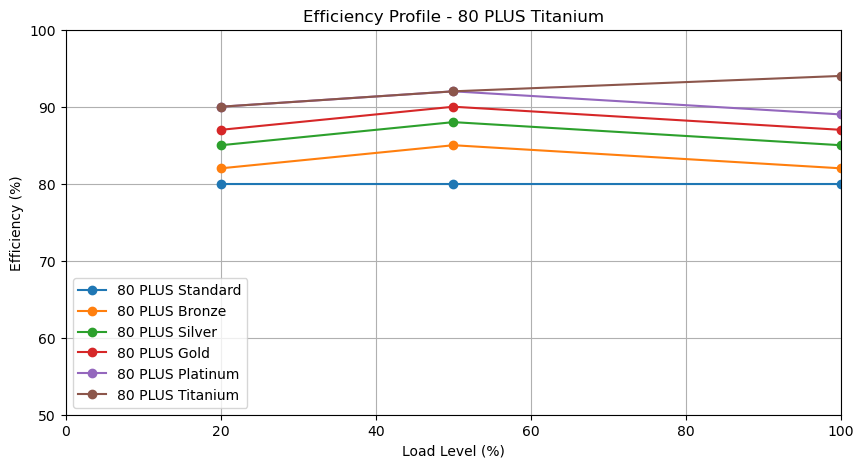

In [19]:
import logging
import numpy as np
import matplotlib.pyplot as plt

logger = logging.getLogger(__name__)

class EMCStandard:

    def __init__(self):
        self.name = None
        self.load_levels = None  # Load levels in percentages (e.g., 20, 50, 100)
        self.efficiency_levels = None  # Efficiency levels as floats (e.g., 0.8 for 80%)

    def plot_efficiency(self, fig=None, ax1=None):
        if fig is None and ax1 is None:
            fig, ax1 = plt.subplots(1, 1, figsize=(10, 5))
        
        # Convert efficiency levels to percentages for plotting
        efficiency_percentages = [eff * 100 for eff in self.efficiency_levels]
        
        # Plot efficiency data
        ax1.plot(self.load_levels, efficiency_percentages, marker='o', label=self.name)
        
        # Configure plot
        ax1.set_xlim(0, 100)
        ax1.set_ylim(50, 100)
        ax1.set_xlabel('Load Level (%)')
        ax1.set_ylabel('Efficiency (%)')
        ax1.set_title(f"Efficiency Profile - {self.name}")
        ax1.grid(True)
        ax1.legend()

        plt.savefig(self.name + ".png")
        # plt.show()

        return fig, ax1


class EfficiencyCertification(EMCStandard):
    """Class for plotting efficiency certifications like 80 PLUS Standard."""

    def __init__(self, certification_name, load_levels, efficiency_levels):
        super().__init__()
        self.name = certification_name
        self.load_levels = load_levels
        self.efficiency_levels = efficiency_levels


class EightyPlusStandard(EfficiencyCertification):
    def __init__(self):
        super().__init__(
            certification_name="80 PLUS Standard",
            load_levels=[20, 50, 100],
            efficiency_levels=[0.8, 0.8, 0.8]
        )

class EightyPlusBronze(EfficiencyCertification):
    def __init__(self):
        super().__init__(
            certification_name="80 PLUS Bronze",
            load_levels=[20, 50, 100],
            efficiency_levels=[0.82, 0.85, 0.82] 
        )

class EightyPlusSilver(EfficiencyCertification):
    def __init__(self):
        super().__init__(
            certification_name="80 PLUS Silver",
            load_levels=[20, 50, 100],
            efficiency_levels=[0.85, 0.88, 0.85]
        )

class EightyPlusGold(EfficiencyCertification):
    def __init__(self):
        super().__init__(
            certification_name="80 PLUS Gold",
            load_levels=[20, 50, 100],  # Load levels as percentages
            efficiency_levels=[0.87, 0.90, 0.87]  # Efficiency levels as floats (e.g., 0.87 for 87%)
        )

class EightyPlusPlatinum(EfficiencyCertification):
    def __init__(self):
        super().__init__(
            certification_name="80 PLUS Platinum",
            load_levels=[20, 50, 100],
            efficiency_levels=[0.90, 0.92, 0.89]
        )

class EightyPlusTitanium(EfficiencyCertification):
    def __init__(self):
        super().__init__(
            certification_name="80 PLUS Titanium",
            load_levels=[20, 50, 100],
            efficiency_levels=[0.90, 0.92, 0.94]
        )

# Example Usage
if __name__ == "__main__":

    fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    EightyPlusStandard().plot_efficiency(fig, ax)
    EightyPlusBronze().plot_efficiency(fig, ax)
    EightyPlusSilver().plot_efficiency(fig, ax)
    EightyPlusGold().plot_efficiency(fig, ax)
    EightyPlusPlatinum().plot_efficiency(fig, ax)
    EightyPlusTitanium().plot_efficiency(fig, ax)
    plt.show()


CEC Weighted Efficiency: 93.86%


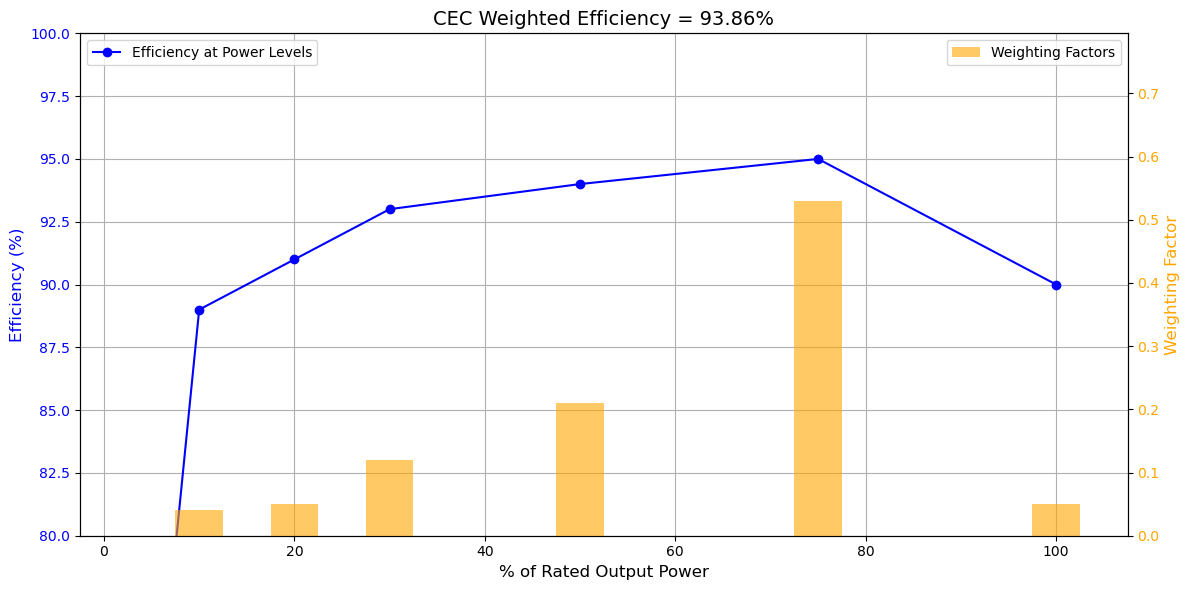

EU Weighted Efficiency: 91.69%


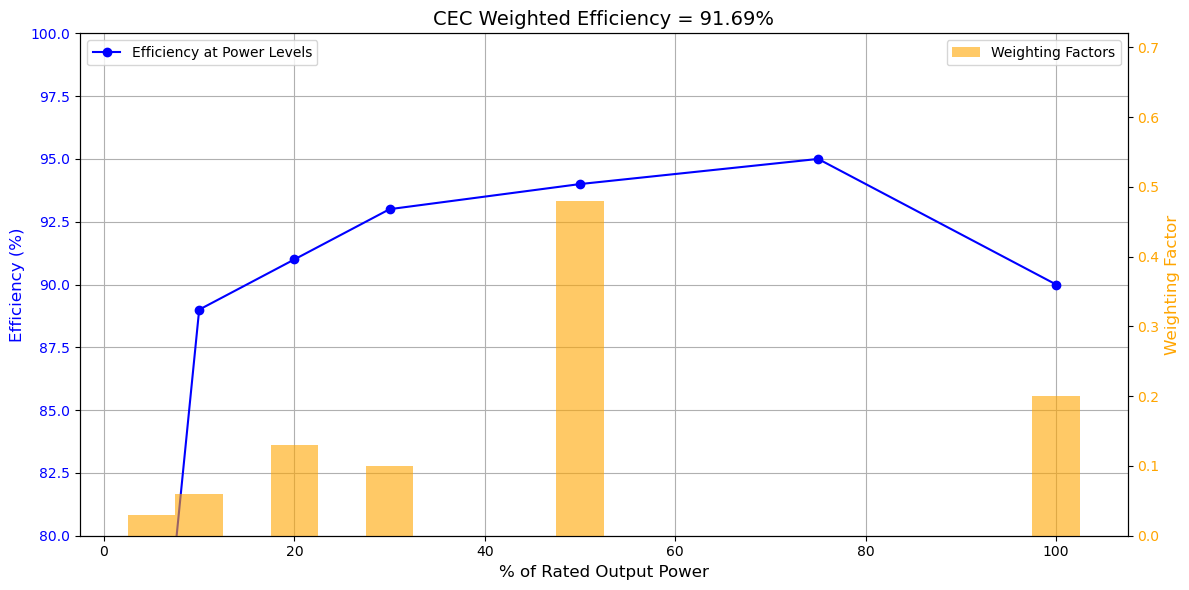

In [18]:
import matplotlib.pyplot as plt

class WeightedEfficiency:
    def __init__(self, power_levels, efficiencies, weights=None, name="Generic Weighted Efficiency"):

        self.name = name
        self.power_levels = power_levels
        self.efficiencies = efficiencies
        if weights is None:
            # Default weights (equal weights)
            self.weights = [1 / len(power_levels)] * len(power_levels)
        else:
            self.weights = weights

    def calculate_weighted_efficiency(self):
        """
        Calculate the weighted efficiency based on the given power levels, efficiencies, and weights.
        
        Returns:
        float: Weighted efficiency as a decimal (e.g., 0.945 for 94.5%).
        """
        weighted_efficiency = sum(
            eff * weight for eff, weight in zip(self.efficiencies, self.weights)
        )
        return weighted_efficiency

    def plot_efficiency(self):
        """
        Plot the efficiency curve with power levels and efficiency values.
        """
        weighted_eff = self.calculate_weighted_efficiency() * 100  # Convert to percentage
        
        fig, ax1 = plt.subplots(figsize=(12, 6))

        # Plot efficiency as a line
        ax1.plot(self.power_levels, [eff * 100 for eff in self.efficiencies], 
                 marker='o', color='b', label="Efficiency at Power Levels")
        ax1.set_xlabel("% of Rated Output Power", fontsize=12)
        ax1.set_ylabel("Efficiency (%)", fontsize=12, color='b')
        ax1.set_ylim(80, 100)  # Assuming efficiencies are typically within 80-100%
        ax1.tick_params(axis='y', labelcolor='b')
        ax1.set_title(f"CEC Weighted Efficiency = {weighted_eff:.2f}%", fontsize=14)
        ax1.legend(loc='upper left', fontsize=10)
        ax1.grid(True)

        # Add bar chart for weights
        ax2 = ax1.twinx()  # Create a second y-axis
        ax2.bar(self.power_levels, self.weights, width=5, color='orange', alpha=0.6, label="Weighting Factors")
        ax2.set_ylabel("Weighting Factor", fontsize=12, color='orange')
        ax2.tick_params(axis='y', labelcolor='orange')
        ax2.set_ylim(0, max(self.weights) * 1.5)
        ax2.legend(loc='upper right', fontsize=10)

        plt.tight_layout()
        plt.show()


# Example Usage
def test_CEC_weighted_efficiency():
    # Example data (power levels, efficiencies, weights)
    power_levels = [5, 10, 20, 30, 50, 75, 100]  # % of rated output power
    efficiencies = [0.7, 0.89, 0.91, 0.93, 0.94, 0.95, 0.90]  # Efficiencies as decimals
    weights = [0, 0.04, 0.05, 0.12, 0.21, 0.53, 0.05]  # Weighting factors
    name = "CECSolarEfficiency"

    cec_efficiency = WeightedEfficiency(power_levels, efficiencies, weights, name)
    
    # Calculate weighted efficiency
    weighted_eff = cec_efficiency.calculate_weighted_efficiency()
    print(f"CEC Weighted Efficiency: {weighted_eff * 100:.2f}%")
    
    # Plot the efficiency curve
    cec_efficiency.plot_efficiency()

def test_EU_weighted_efficiency():
    # Example data (power levels, efficiencies, weights)
    power_levels = [5, 10, 20, 30, 50, 75, 100]  # % of rated output power
    efficiencies = [0.7, 0.89, 0.91, 0.93, 0.94, 0.95, 0.90]  # Efficiencies as decimals
    weights = [0.03, 0.06, 0.13, 0.10, 0.48, 0, 0.20]  # Weighting factors
    name = "EUSolarEfficiency"

    eu_efficiency = WeightedEfficiency(power_levels, efficiencies, weights, name)
    
    # Calculate weighted efficiency
    weighted_eff = eu_efficiency.calculate_weighted_efficiency()
    print(f"EU Weighted Efficiency: {weighted_eff * 100:.2f}%")
    
    # Plot the efficiency curve
    eu_efficiency.plot_efficiency()

# Example Usage
if __name__ == "__main__":
    test_CEC_weighted_efficiency()
    test_EU_weighted_efficiency()
